# Домашнее задание № 0


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Самостоятельное написание дерева решений
Источник: [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, нужно построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. 

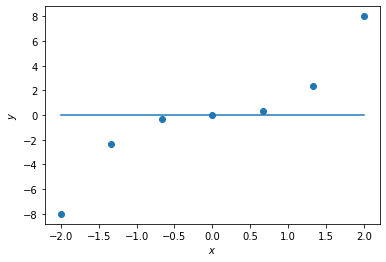

In [3]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

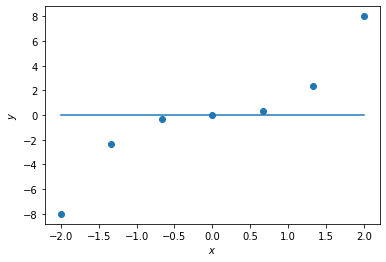

In [4]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$');

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

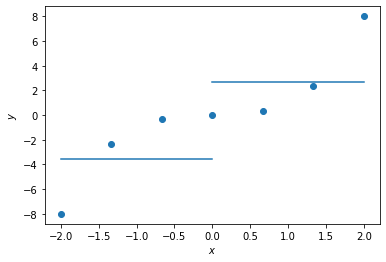

In [5]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,0,25), np.linspace(np.mean(y[:3]),np.mean(y[:3]),25))
plt.plot(np.linspace(0,2,25), np.linspace(np.mean(y[3:]),np.mean(y[3:]),25), c='C0')
plt.ylabel(r'$y$');

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий: $$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$ где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[xj < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$: $$D(X) = \dfrac{1}{|X|} \sum{x_j \in X}(yj – \dfrac{1}{|X|}\sum{x_i \in X}y_i)^2,$$ где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине).

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [6]:
def D(X):
    N = len(X)
    return np.sum((X[:] - np.sum(X)/N)**2)/N

def Q(X,y,t):
    l = N = len(X)
    for x in enumerate(X):
        if x[1] >= t:
            l = x[0]
            break
    return D(y) - l/N*D(y[:l]) - (N-l)/N*D(y[l:])

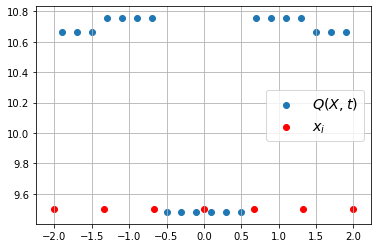

In [7]:
X = np.linspace(-2, 2, 7)
y = X ** 3
T = np.linspace(-1.9, 1.9, 20)
Q_t = [Q(X,y,t) for t in T]

plt.scatter(T, Q_t, label=r'$Q(X,t)$')
plt.scatter(X, np.ones_like(X)*9.5, c='r', label=r'$x_i$')
plt.legend(fontsize='x-large')
plt.grid()

А теперь на основе значений полученной функции постройте дерево глубины 1.

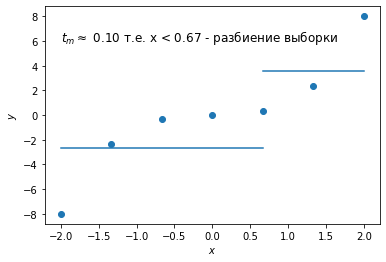

In [46]:
t = T[np.argmin(Q_t)]

l = len(X)
for x in enumerate(X):
    if x[1] >= t:
        l = x[0]
        break

plt.text(-2, 6, r'$t_m \approx$ %.2f т.е. x < %.2f - разбиение выборки' % (t,X[l]), fontsize=12)

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.plot(np.linspace(X[0],X[l],25), [np.mean(y[:l])]*25)
plt.plot(np.linspace(X[l],X[-1],25), [np.mean(y[l:])]*25, c="C0")